# Loading and analysing RNA-Seq data with Python

[Bulk RNA-sequencing (RNA-Seq) technology](https://bioinformatics.ccr.cancer.gov/btep/getting-started/) measures levels of gene expression for entire samples. Therefore, they do not differenciate among cell types within the sample. 

RNA-Seq experimental data needs to go through several pre-processing steps to arrive to [normalized values](https://hbctraining.github.io/DGE_workshop_salmon/lessons/02_DGE_count_normalization.html
) that allow comparison between different samples.

In [56]:
%%HTML
<iframe width="560" height="315"
 src="https://youtube.com/embed/tlf6wYJrwKY"
</iframe>

## LPS RNA-Seq dataset

A typical RNA-seq data file contains columns for the different measured samples, and rows for each gene. This is the type of data that we will read in this notebook. We will use data from a multi-omics study of dendritic cells during LPS (lipopolysaccharide) stimulation done at the Garber lab:

[Donnard et al. Comparative Analysis of Immune Cells Reveals a Conserved Regulatory Lexicon. Cell Systems 2018](https://pubmed.ncbi.nlm.nih.gov/29454939/)

The data comprises 17 human donors and over 10 thousand genes.

### Loading the data

The file is stored in TSV (Tab-separated format) so we need to tell pandas to use the correct character to separate the columns. We can use the [escape character](https://www.w3schools.com/python/gloss_python_escape_characters.asp) '\t' to indicate the Tab (which we would not ablew to type otherwise):

In [57]:
import pandas as pd
df = pd.read_csv('batch_corrected_tpm.tsv', sep='\t')
df

,rsem.out.D01_MDDC_Ctrl_0h,rsem.out.D01_MDDC_Ctrl_120h,rsem.out.D01_MDDC_Lps_12h,rsem.out.D01_MDDC_Lps_1h,rsem.out.D01_MDDC_Lps_24h,rsem.out.D01_MDDC_Lps_2h,rsem.out.D01_MDDC_Lps_4h,rsem.out.D01_MDDC_Lps_6h,rsem.out.D09_MDDC_Ctrl_0h,rsem.out.D09_MDDC_Ctrl_120h,...,rsem.out.F33_MDDC_Lps_1h,rsem.out.F33_MDDC_Lps_24h,rsem.out.F33_MDDC_Lps_2h,rsem.out.F33_MDDC_Lps_30m,rsem.out.F33_MDDC_Lps_4h,rsem.out.F33_MDDC_Lps_6h,rsem.out.G40_MDDC_Lps_2h,rsem.out.G40_MDDC_Lps_6h,rsem.out.G41_MDDC_Lps_2h,rsem.out.G41_MDDC_Lps_6h
RPS11,2966.003181,2527.217203,2232.529003,2781.490688,1629.466099,2818.612413,2380.521452,2465.919133,2710.162233,3220.602733,...,2975.042984,1878.622185,2693.793328,2923.381798,2203.596572,2096.296081,2832.544701,1987.454305,2474.734283,2314.386619
ELMO2,24.944727,26.241479,45.047532,20.347192,33.263392,18.344631,31.999284,44.436236,24.502283,36.076469,...,23.163764,31.301492,16.788901,24.070872,34.901587,49.222670,24.843361,33.454842,21.330241,41.851846
PNMA1,22.911707,22.911707,21.881046,21.881046,41.122517,21.881046,21.881046,27.010681,21.057745,18.217202,...,21.636211,36.420088,18.179567,25.073311,20.486331,21.636211,20.666177,28.983175,22.456111,29.381395
MMP2,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,2.480635,0.874274,...,2.018865,0.931542,0.931542,0.931542,0.931542,2.018865,2.555164,1.632957,2.003892,2.200302
TRAF3IP2-AS1,2.889639,1.583910,1.583910,2.889639,1.583910,1.583910,2.889639,2.889639,1.652200,1.652200,...,1.627323,1.627323,2.942854,1.627323,4.258908,2.942854,2.356925,3.393431,3.395857,2.253869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCIF1,19.313654,19.313654,20.733990,14.990989,28.402056,12.788201,10.550735,17.164767,19.900583,19.900583,...,16.108115,24.789572,10.708126,19.358573,11.786081,16.108115,12.606197,21.777373,16.560121,16.560121
PIK3IP1,8.416499,6.804120,2.418235,5.125868,1.429923,4.254408,0.355897,1.429923,9.827003,7.228761,...,3.862856,4.873248,0.883002,8.967542,2.859646,1.865377,2.178233,5.949715,2.339124,4.619712
SNRPD2,96.862861,79.704790,65.813845,82.004761,79.704790,79.704790,44.615771,65.813845,97.180902,92.159707,...,67.981267,78.123978,84.955390,84.955390,64.630326,60.187407,74.418169,67.742037,52.001339,87.492902
SLC39A6,63.113874,67.075910,58.240562,56.584399,107.865091,59.062463,58.240562,49.778744,63.885608,75.226267,...,66.419768,69.119406,66.419768,70.473403,55.739436,50.476137,51.432619,74.394764,61.052326,64.507886


Note how the data frame df uses the list of genes as as an [Index](https://pandas.pydata.org/docs/reference/api/pandas.Index.html) object for rows of the table:

In [58]:
df.index

Index(['RPS11', 'ELMO2', 'PNMA1', 'MMP2', 'TRAF3IP2-AS1', 'ERCC5', 'APBB2',
       'NAPRT', 'PDCL3', 'AEN',
       ...
       'HCLS1', 'LOC100093631', 'CSF2', 'SELO', 'RAB8A', 'PCIF1', 'PIK3IP1',
       'SNRPD2', 'SLC39A6', 'CTSC'],
      dtype='object', length=10049)

In [59]:
type(df.index)

pandas.core.indexes.base.Index

The columns of a data frame are also of Index type:

In [60]:
df.columns

Index(['rsem.out.D01_MDDC_Ctrl_0h', 'rsem.out.D01_MDDC_Ctrl_120h',
       'rsem.out.D01_MDDC_Lps_12h', 'rsem.out.D01_MDDC_Lps_1h',
       'rsem.out.D01_MDDC_Lps_24h', 'rsem.out.D01_MDDC_Lps_2h',
       'rsem.out.D01_MDDC_Lps_4h', 'rsem.out.D01_MDDC_Lps_6h',
       'rsem.out.D09_MDDC_Ctrl_0h', 'rsem.out.D09_MDDC_Ctrl_120h',
       'rsem.out.D09_MDDC_Lps_12h', 'rsem.out.D09_MDDC_Lps_1h',
       'rsem.out.D09_MDDC_Lps_24h', 'rsem.out.D09_MDDC_Lps_2h',
       'rsem.out.D09_MDDC_Lps_4h', 'rsem.out.D09_MDDC_Lps_6h',
       'rsem.out.D10_MDDC_Ctrl_0h', 'rsem.out.D10_MDDC_Lps_12h',
       'rsem.out.D10_MDDC_Lps_24h', 'rsem.out.D10_MDDC_Lps_2h',
       'rsem.out.D10_MDDC_Lps_4h', 'rsem.out.D10_MDDC_Lps_6h',
       'rsem.out.D12_MDDC_Ctrl_0h', 'rsem.out.D12_MDDC_Lps_12h',
       'rsem.out.D12_MDDC_Lps_1h', 'rsem.out.D12_MDDC_Lps_4h',
       'rsem.out.D13_MDDC_Ctrl_0h', 'rsem.out.D13_MDDC_Lps_12h',
       'rsem.out.D13_MDDC_Lps_1h', 'rsem.out.D13_MDDC_Lps_4h',
       'rsem.out.D14_MDDC_Ctrl_0h', 

In [61]:
type(df.columns)

pandas.core.indexes.base.Index

We can use the column and index labels to access any element we want in the data frame. Indexing a column will return the entire contents of that column as a [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) object:

In [62]:
df['rsem.out.D01_MDDC_Ctrl_0h']

RPS11           2966.003181
ELMO2             24.944727
PNMA1             22.911707
MMP2               1.041861
TRAF3IP2-AS1       2.889639
                   ...     
PCIF1             19.313654
PIK3IP1            8.416499
SNRPD2            96.862861
SLC39A6           63.113874
CTSC            3820.365917
Name: rsem.out.D01_MDDC_Ctrl_0h, Length: 10049, dtype: float64

If we index the column series using the label of the row, we will get the individual data element contained at that row and column:

In [63]:
df['rsem.out.D01_MDDC_Ctrl_0h']['RPS11']

2966.0031808619

Pandas offers many ways of [indexing and selecting data](https://pandas.pydata.org/docs/user_guide/indexing.html). For example, we can select groups of columns and ranges of rows as follows:

In [64]:
# We select two columns, 'rsem.out.D01_MDDC_Ctrl_0h' and 'rsem.out.D01_MDDC_Lps_4h'. 
# The result is not a Series object byt a new DataFrame because it has more than one column of data:
df[['rsem.out.D01_MDDC_Ctrl_0h', 'rsem.out.D01_MDDC_Lps_4h']]

,rsem.out.D01_MDDC_Ctrl_0h,rsem.out.D01_MDDC_Lps_4h
RPS11,2966.003181,2380.521452
ELMO2,24.944727,31.999284
PNMA1,22.911707,21.881046
MMP2,1.041861,1.041861
TRAF3IP2-AS1,2.889639,2.889639
...,...,...
PCIF1,19.313654,10.550735
PIK3IP1,8.416499,0.355897
SNRPD2,96.862861,44.615771
SLC39A6,63.113874,58.240562


The index labels can be used slice the rows of the data frame:

In [65]:
# This returns a Series containing the range of sliced rows:
df['rsem.out.D01_MDDC_Ctrl_0h']['RPS11':'MMP2']

RPS11    2966.003181
ELMO2      24.944727
PNMA1      22.911707
MMP2        1.041861
Name: rsem.out.D01_MDDC_Ctrl_0h, dtype: float64

How a data file is read into a data frame by pandas depends on the options you pass to the pd.read_csv() call, which are many:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

There are many resources online beyond the official documentaiton from the pandas project, such as [tutorials](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/) and "cheat sheets" for quick reference: 

![Pandas basic cheat sheet](https://images.datacamp.com/image/upload/f_auto,q_auto:best/v1621255989/Pandas_Cheat_Sheet_for_Data_Science_in_Python_hqirhp.png)

### What's the purpose of loading this data into pandas?

To determine what program we should write to work on this RNA-Seq dataset, we need to know what kind of analysis or visualization we are interested in. 

In this case, we want to see the expression levels of the genes over time, so can see determine which ones express earlier and which ones later on. But the data is not structured in a way that is possible to plot the expression levels over time directly, we need to re-arrange the data.

Since the observation times of the samples are ordered categorical values (30m < 1h < 2h < 4h ...) we can construct in pandas a custom type precisely to handle these values:

In [66]:
obs_times = pd.CategoricalDtype(categories=['30m', '1h', '2h', '4h', '6h', '12h', '24h'], ordered=True)
obs_times

CategoricalDtype(categories=['30m', '1h', '2h', '4h', '6h', '12h', '24h'], ordered=True, categories_dtype=object)

We can now define a [function](https://www.datacamp.com/tutorial/functions-python-tutorial) to extract the donor data given their ID to manipulate it elsewhere in our notebook:

In [67]:
def get_donor_data(all_data, donor_id):
    # We filter the columns using a regular expression to select 
    # only the columns corresponding to the LPS samples for donor 
    # with donor_id
    donor_data = all_data.filter(regex=donor_id + '_MDDC_Lps')
    # We can transpose the data so now the samples become the rows:
    donor_data = donor_data.transpose()
    # The index is the column names, which are long strings separated by underscores,
    # such as 'rsem.out.D01_MDDC_Ctrl_0h'. Both Series and Index offer a 'str' interface
    # to apply string functions to all the values in them, here we apply split('_') to
    # get the individual pieces of the sample names:
    idx = donor_data.index.str.split('_') 
    # The fourth element contains the observation time, which we can convert into our
    # custom categorical type and re-assing to the data frame index:
    donor_data.index = idx.str[3].astype(obs_times)
    # We sort the index in place to the rows are ordered in ascending order:
    donor_data.sort_index(inplace=True)
    # We now return a dataframe that should contain exactly what we need:
    return donor_data

In [68]:
dd = get_donor_data(df, 'D01')
dd

,RPS11,ELMO2,PNMA1,MMP2,TRAF3IP2-AS1,ERCC5,APBB2,NAPRT,PDCL3,AEN,...,HCLS1,LOC100093631,CSF2,SELO,RAB8A,PCIF1,PIK3IP1,SNRPD2,SLC39A6,CTSC
1h,2781.490688,20.347192,21.881046,1.041861,2.889639,31.382917,1.476682,20.319308,27.708450,9.373572,...,181.946053,9.592494,1.642633,8.417834,142.182572,14.990989,5.125868,82.004761,56.584399,3539.604422
2h,2818.612413,18.344631,21.881046,1.041861,1.583910,25.059646,1.476682,18.860001,23.866619,14.801441,...,182.704551,16.496087,8.450410,7.555451,146.869371,12.788201,4.254408,79.704790,59.062463,3355.972573
4h,2380.521452,31.999284,21.881046,1.041861,2.889639,9.978653,1.476682,15.096522,22.576627,9.373572,...,143.619291,7.300891,1.642633,4.972561,168.388859,10.550735,0.355897,44.615771,58.240562,2960.638776
6h,2465.919133,44.436236,27.010681,1.041861,2.889639,14.334036,1.476682,5.888989,13.378319,6.695771,...,111.045094,6.538453,0.305678,9.280815,210.543412,17.164767,1.429923,65.813845,49.778744,2514.713105
12h,2232.529003,45.047532,21.881046,1.041861,1.583910,17.709975,3.468510,15.096522,17.361194,4.052238,...,84.146404,2.740942,0.305678,8.417834,281.860944,20.733990,2.418235,65.813845,58.240562,2123.479027
24h,1629.466099,33.263392,41.122517,1.041861,1.583910,28.242083,7.062228,15.864006,25.151743,6.695771,...,110.178387,6.538453,0.305678,10.144344,312.735799,28.402056,1.429923,79.704790,107.865091,2411.422662


In [69]:
dd['TNF']

1h     4193.523253
2h     3118.099852
4h      712.233385
6h      289.467284
12h      69.278845
24h      12.094913
Name: TNF, dtype: float64

The Series above contains all the expression levels of gene TNF measured for donor D01. Note that it does not have a 30m measurement. We can create a simple line plot to see the trend in the data for this donor:

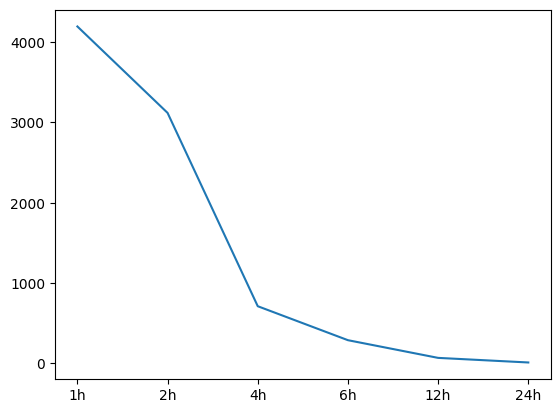

In [70]:
# We now plot this data using matplotlib
import matplotlib.pyplot as plt

plt.plot(dd['TNF'])

We can use a list to store all the values we have in the data frame, and insert zeroes for those times when the obervation is missing:

In [71]:
values = []
for obs in obs_times.categories:
    if obs in dd.index:
       values += [dd['TNF'][obs]]
    else:
        values += [0]
values

[0,
 4193.52325304594,
 3118.09985228189,
 712.233385399757,
 289.467283666009,
 69.2788450387103,
 12.0949134603139]

With 7 distinct values in this list, we can now create a box plot for donor D01:

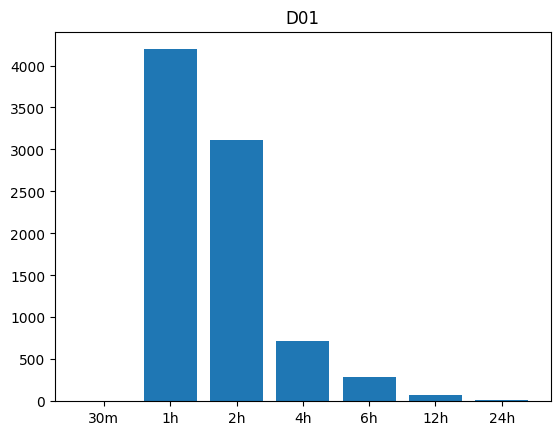

In [72]:
plt.title('D01')
plt.bar(obs_times.categories, values)
plt.show()

The code to populate the values can be reduced significanly by combining a [list comprehension](https://realpython.com/list-comprehension-python/
) with a [ternary operator](https://book.pythontips.com/en/latest/ternary_operators.html
):

In [73]:
values = [dd['TNF'][v] if v in dd.index else 0 for v in obs_times.categories] 
# The output should be the same as before
values

[0,
 4193.52325304594,
 3118.09985228189,
 712.233385399757,
 289.467283666009,
 69.2788450387103,
 12.0949134603139]

### Generating plots for all donors

We could retrieve the data from each donor one by one manually passing their IDs to the get_donor_data() function. But we could extract all the donor IDs automatically from the original dataframe columns by making a slightly more advanced of [regular expressions](https://www.youtube.com/watch?v=UQQsYXa1EHs):

In [74]:
import re
donors = []
for col in df.columns:
    # With this regex, we search for positions in the input string (col) 
    # that start with a dot (.) continues with any single uppercase letter 
    # ([A-Z), followed by any combination of digits ([0-9]) of ant length (+), 
    # and ending with the underscore character (_).
    res = re.findall('.[A-Z][0-9]+_', col)
    if len(res) == 1:
        id = res[0][1:-1]
        if id not in donors:
            donors += [id]
print(donors)

['D01', 'D09', 'D10', 'D12', 'D13', 'D14', 'E01', 'E02', 'E81', 'E86', 'E91', 'E94', 'F30', 'F32', 'F33', 'G40', 'G41']


Now we can iterate over all the elements in donors and generate one bar plot for each one, given the gene of interest:

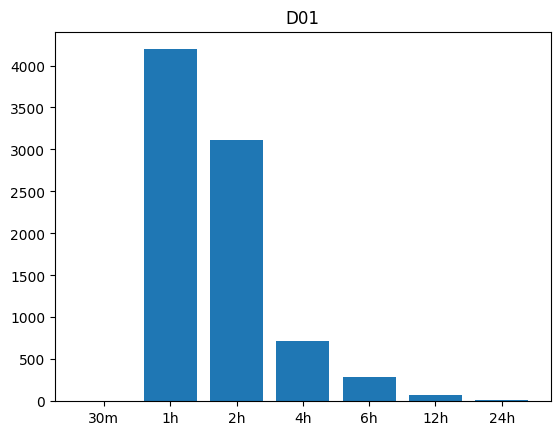

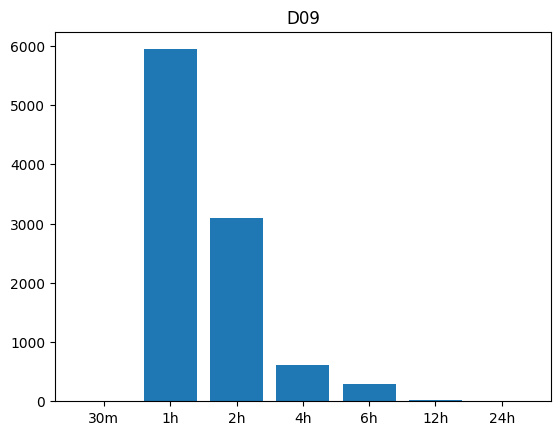

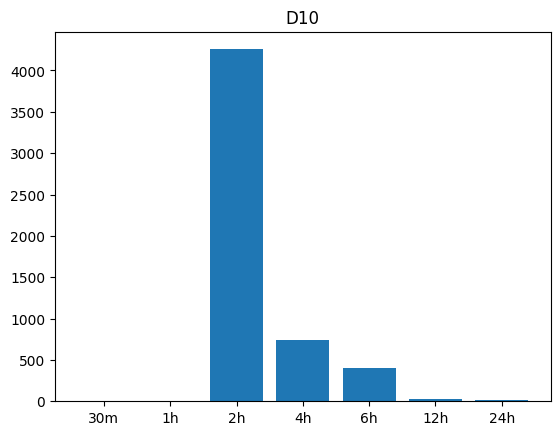

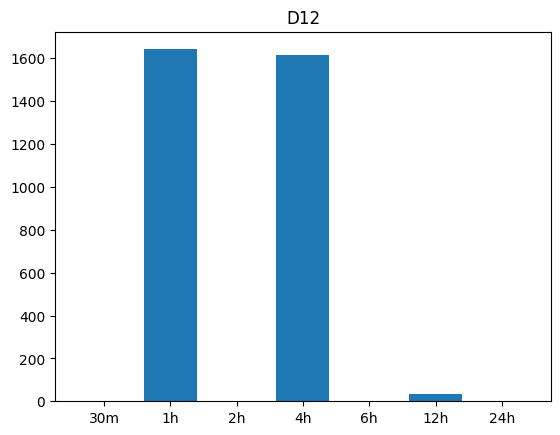

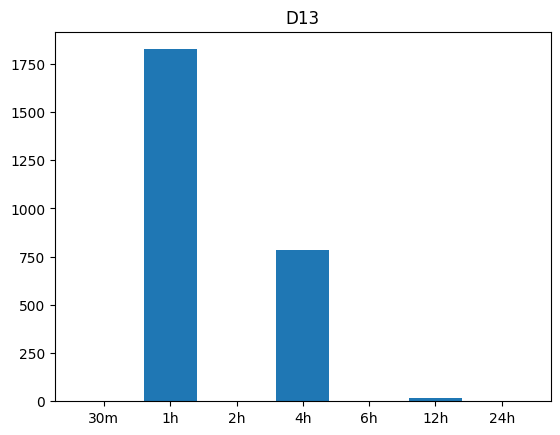

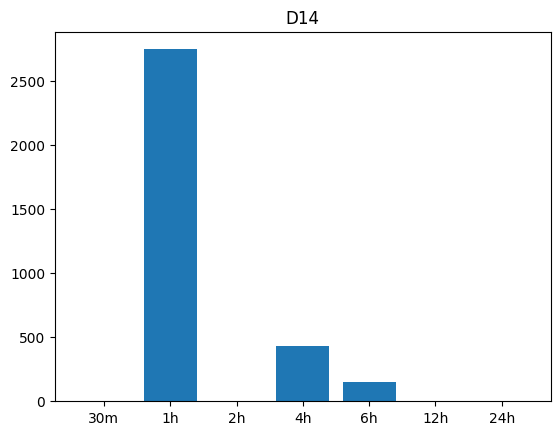

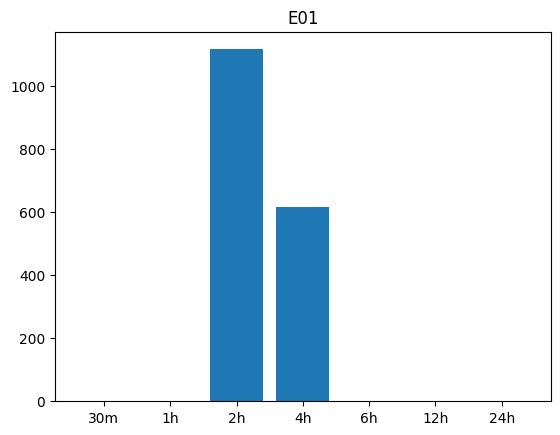

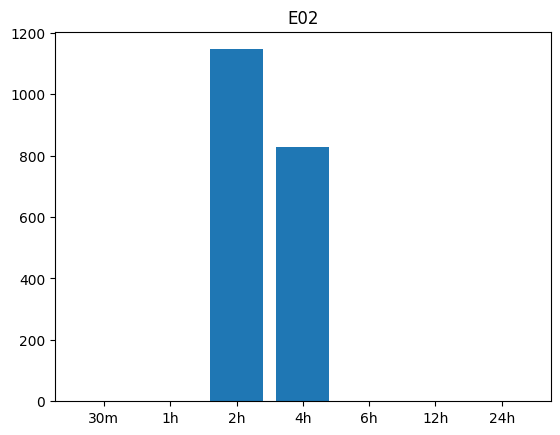

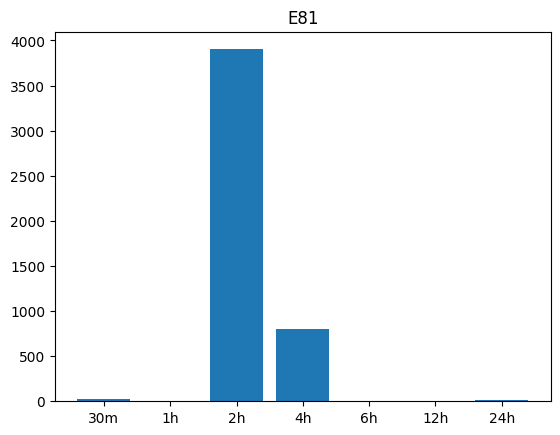

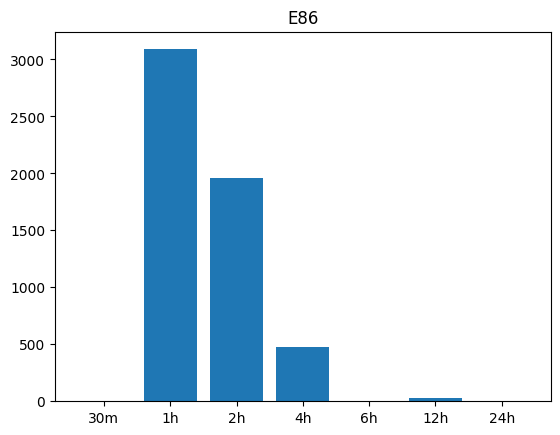

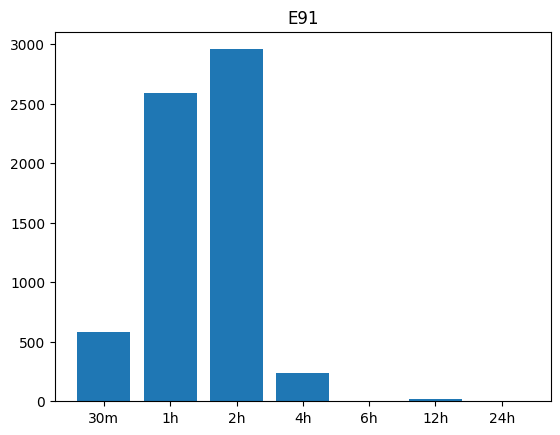

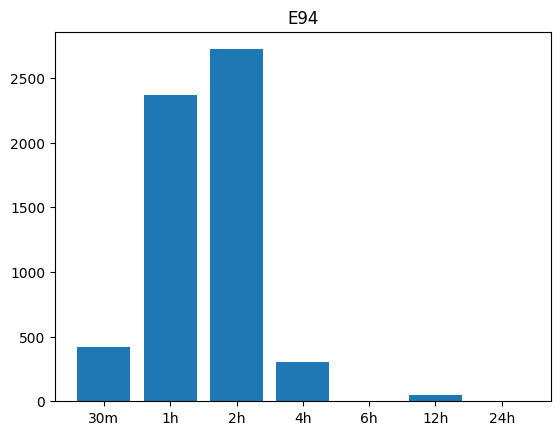

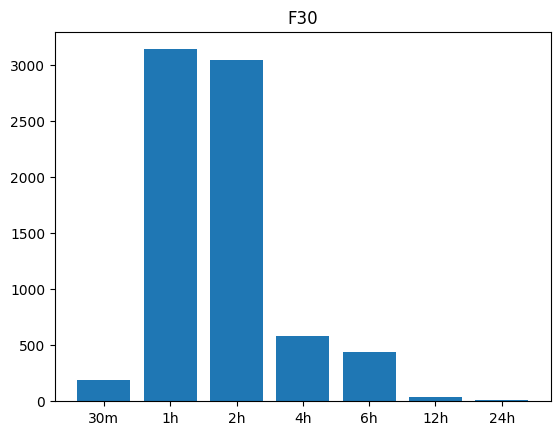

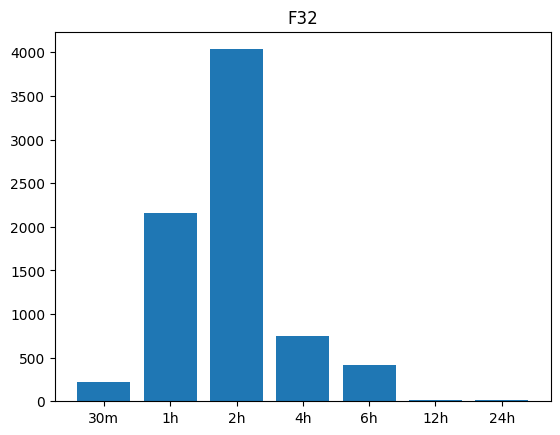

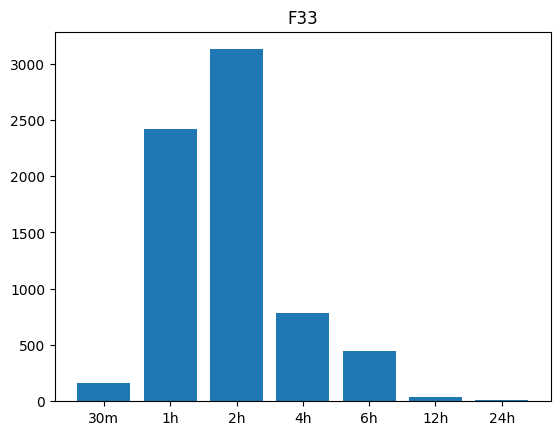

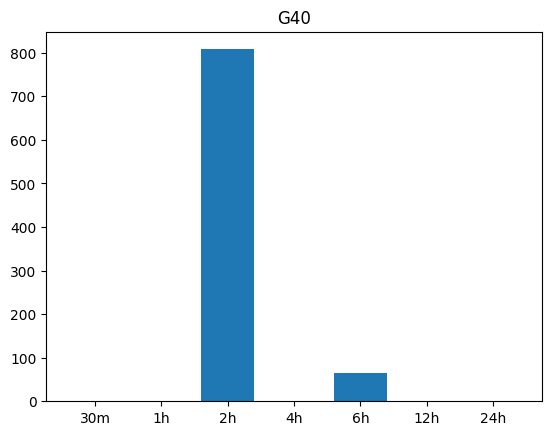

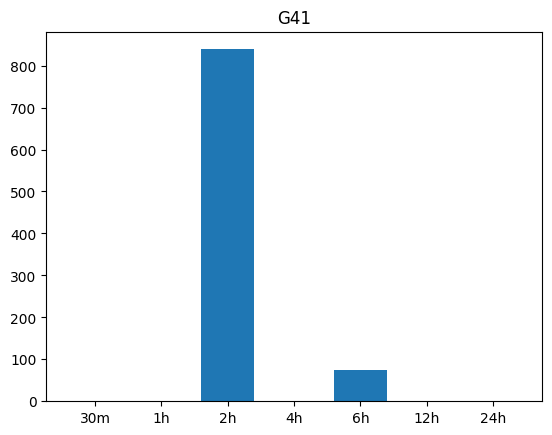

In [75]:
gene = 'TNF'
for id in donors:
    dd = get_donor_data(df, id)
    values = [dd[gene][v] if v in dd.index else 0 for v in obs_times.categories] 
    plt.title(id)
    plt.bar(obs_times.categories, values)
    plt.show()

### Using dictionaries to aggregate data

If we are able to aggregate the expression levels for each donor at each observation time, we could then create a boxplot for each observation to understand the distribution of the expression levels over time. We can apply a [Python dictionary](https://realpython.com/python-dicts/) to do this very easily:

In [76]:
# We initializd an empty dictionary
expr_values = {}
for obs in obs_times.categories:
    # We assign an empty list to each key in the dictionary
    expr_values[obs] = []
print(expr_values)
gene = 'TNF'
for id in donors:
    dd = get_donor_data(df, id)  
    for obs in expr_values:
        if obs in dd.index:
            # If there is data for this time point, we add it to the list at the 
            # corresponding location in the dictionary. Note that expr_values[obs]
            # returns the current list associated to the key obs, and we add the new
            # value dd[gene][obs] to that list.
            expr_values[obs] += [dd[gene][obs]]
for obs in obs_times.categories:
    print('Expression values at', obs, expr_values[obs])

{'30m': [], '1h': [], '2h': [], '4h': [], '6h': [], '12h': [], '24h': []}
Expression values at 30m [25.9875178321635, 583.534011862849, 420.442254717741, 193.997792201739, 222.483233895917, 158.473899137166]
Expression values at 1h [4193.52325304594, 5940.42749834026, 1641.79846371526, 1824.87638313985, 2748.367221973, 3088.71317957544, 2588.60477974256, 2370.24852486151, 3140.71153477713, 2152.61749157619, 2419.35489827892]
Expression values at 2h [3118.09985228189, 3085.02356812052, 4255.95177981043, 1116.81665755495, 1145.78128567276, 3901.4851462259, 1962.8575299495, 2957.93188990036, 2720.96399321605, 3041.27945854371, 4034.12449750559, 3127.22362762817, 807.592025048947, 838.865310906173]
Expression values at 4h [712.233385399757, 619.540099602427, 743.019398884879, 1614.52744824108, 786.043565041238, 431.489498686238, 616.63134567524, 826.426420774049, 798.398532736703, 477.69031134338, 239.440673771852, 300.648440349435, 583.627748688922, 751.121693057979, 785.316005753273]
Exp

We can use a list comprehension to extract all the list of expression values in the dictionary, and use them as the argument for boxplot. We apply [some settings](https://python-charts.com/distribution/box-plot-matplotlib/) to customize the appreance of the final plot:

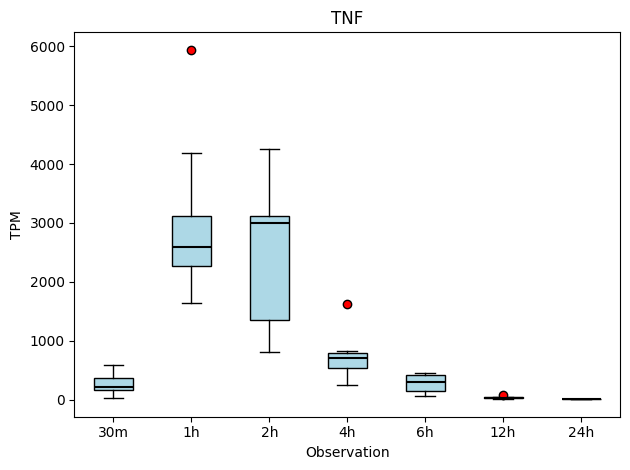

In [77]:
data = [expr_values[obs] for obs in obs_times.categories]
plt.boxplot(data, patch_artist = True, boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "black", linewidth = 1.5), flierprops = dict(markerfacecolor = "red"))
plt.title('TNF')
plt.xticks(ticks=range(1, len(obs_times.categories) + 1), labels=obs_times.categories)
plt.xlabel('Observation')
plt.ylabel('TPM')
plt.tight_layout()
plt.savefig("tnf_over_time.pdf")